
### Genel Bakış
2024 Kaggle Oyun Alanı Serisine hoş geldiniz! Topluluğumuzun makine öğrenimi becerilerini geliştirmesi için ilginç ve ulaşılabilir veri kümeleri sunarak önceki oyun alanlarının ruhunu sürdürmeyi ve her ay bir yarışma öngörmeyi planlıyoruz.

### Amaç
Bu yarışmanın amacı, bireylerde kardiyovasküler hastalıklarla ilişkili obezite riskini tahmin etmek için çeşitli faktörleri kullanmaktır. İyi şanlar!

In [1]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Data yükleme
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Datanın satır ve sütun sayısına bakma
print("train: ",train.shape)
print("test: ", test.shape)

train:  (20758, 18)
test:  (13840, 17)


In [3]:
# Train verisinin ilk birkaç satırını görme
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Test verisinin ilk birkaç satırını görme
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
# Train veri kümesinin genel bilgilerini görme
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
# Test veri kümesinin genel bilgilerini görme
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [7]:
# Sayısal sütunların istatistiksel özetine bakma
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
# Sayısal sütunların istatistiksel özetine bakma
test.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
# Her bir sütundaki benzersiz değerlerin sayısına bakma
train.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [10]:
# Train veri kümesindeki "NObeyesdad" sütununda bulunan benzersiz değerlere bakma
train.NObeyesdad.unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [11]:
# NObeyesdad sütunundaki kategorik değerleri sayısal değerlere dönüştürme
le = LabelEncoder()
train['NObeyesdad'] = le.fit_transform(train['NObeyesdad'])

In [12]:
# Train ve test veri çerçevelerini birleştirme
con_data = pd.concat([train, test], axis=0)

In [13]:
# One-hot encoding yaparak kategorik değişkenleri modele uygun hale getirme
con_data  = pd.get_dummies(con_data )

In [14]:
# Birleştirilmiş veri çerçevesini satır indekslerine göre ikiye bölme
train = con_data.iloc[: 20758]
test = con_data.iloc[20758 :]

In [16]:
# id ve NObeyesdad sütunlarını düşürerek girdi özelliklerini oluşturma
X = train.drop(['id', 'NObeyesdad'], axis=1)
y = train['NObeyesdad'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
# XGBClassifier sınıfını kullanarak bir XGBoost sınıflandırıcı oluşturma ve ardından fit() yöntemini kullanarak eğitim verilerini modele uygun hale getirme
from xgboost import XGBClassifier

classifier = XGBClassifier()

classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [18]:
# Eğitilmiş bir sınıflandırıcı modeli kullanarak test setindeki girdi özelliklerine (X_test) dayanarak tahminler yapma
y_pred = classifier.predict(X_test)

In [19]:
print(y_pred)

[4 5 2 ... 2 4 2]


In [20]:
test

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,20758,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,NaN,...,False,False,False,True,False,False,False,False,True,False
1,20759,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,NaN,...,False,False,False,True,False,False,False,False,True,False
2,20760,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,NaN,...,False,False,False,True,False,False,False,False,True,False
3,20761,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,NaN,...,False,False,False,True,False,False,False,False,True,False
4,20762,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,NaN,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,NaN,...,False,False,False,True,False,False,False,False,True,False
13836,34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN,...,False,False,False,True,False,False,False,False,True,False
13837,34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,NaN,...,False,False,False,True,False,False,False,False,True,False
13838,34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,NaN,...,False,False,False,False,True,False,False,False,True,False


In [21]:
# "test" adlı veri çerçevesinden belirli sütunları çıkararak yeni bir veri çerçevesi oluşturma
test1 = test.drop(columns=['id', 'NObeyesdad'])

In [22]:
# test1 veri çerçevesinin tüm satır ve sütunlarını seçerek bir NumPy dizisi oluşturma
unseen = test1.iloc[:, :].values

In [23]:
# classifier adlı bir model ile "unseen" adlı veri üzerinde tahmin yapma
unseen_pred = classifier.predict(unseen)

In [24]:
# test veri çerçevesine "NObeyesdad" adında yeni bir sütun ekler ve bu sütuna "unseen_pred" adlı dizinin değerlerini atama
test['NObeyesdad'] = unseen_pred

In [25]:
test.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,20758,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,3,...,False,False,False,True,False,False,False,False,True,False
1,20759,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,5,...,False,False,False,True,False,False,False,False,True,False
2,20760,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,4,...,False,False,False,True,False,False,False,False,True,False
3,20761,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,2,...,False,False,False,True,False,False,False,False,True,False
4,20762,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,4,...,False,False,False,True,False,False,False,False,True,False


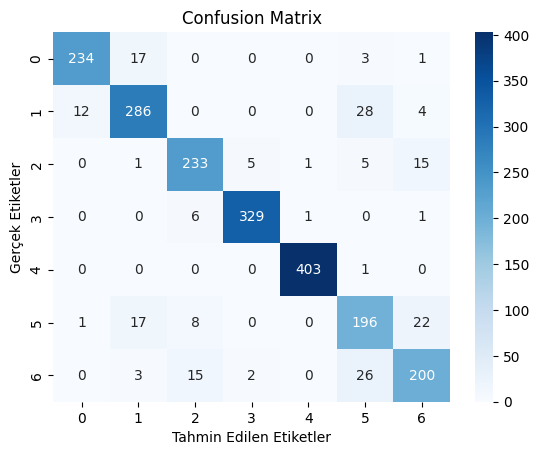

In [26]:
# Confusion matrix oluşturarak ve bu matrisi bir ısı haritası olarak görselleştirerek sınıflandırma modelinin performansını değerlendirme
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [27]:
# Tahmin edilen değerlerle gerçek hedef değerleri karşılaştırarak modelin doğruluğunu hesapla
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

Doğruluk: 0.9060693641618497


In [28]:
# Tahminleri içeren bir DataFrame oluşturma
submission = test[['id', 'NObeyesdad']]
# Submission dosyasının gerektirdiği formata dönüştürme (örneğin, CSV formatı)
# submission.to_csv('submission.csv', index=False)